# Reinforcement Learning - Sutton and Barto
# Exercise 7.2

n-step TD Methods Comparison

In [1]:
import numpy as np
from tqdm import tqdm

import matplotlib
import matplotlib.pyplot as plt

from RandomWalk import randomwalk
import n_step_TD as agent

# Random Walk

## Initialize Environment

In [2]:
env = randomwalk()

Actions: [array([0, 1]), array([ 0, -1])]


C:\users\cafaya\OneDrive - Emerson\Documents\MyTrainings\AI_Training\RL_Sutton_Barton_Studies\Chapter 7\RandomWalk.py:92: UserWarning: FixedFormatter should only be used together with FixedLocator
  self.ax.set_xticklabels(["0", "T", "A", "B", "C", "D", "E", "T"])


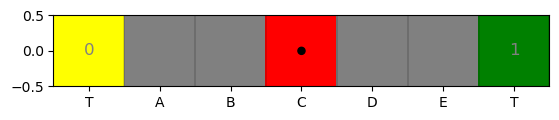

In [3]:
env.render()

## Test the policy $\pi(s)$

In [4]:
for i in range (10):
    action = env.policy()
    print(f"Action taken: {action}")

Action taken: 0
Action taken: 1
Action taken: 0
Action taken: 1
Action taken: 0
Action taken: 0
Action taken: 0
Action taken: 1
Action taken: 0
Action taken: 1


# Execute both models

In [5]:
size = env.observation_space[1]

n = 4
state_values = agent.initialize_state_values((env.observation_space[0],env.observation_space[1]))
print(f"State Values: {state_values}")

State Values: [[0.  0.5 0.5 0.5 0.5 0.5 0. ]]


In [6]:
n_step_td_history = agent.n_step_td_estimating(env, state_values, episodes=10, n=n, alpha=0.1, debug=False)

Episode: 1 Finished | Average Steps: 14.0
Episode: 2 Finished | Average Steps: 14.0
Episode: 3 Finished | Average Steps: 14.0
Episode: 4 Finished | Average Steps: 12.0
Episode: 5 Finished | Average Steps: 14.0
Episode: 6 Finished | Average Steps: 18.0
Episode: 7 Finished | Average Steps: 16.0
Episode: 8 Finished | Average Steps: 6.0
Episode: 9 Finished | Average Steps: 8.0
Episode: 10 Finished | Average Steps: 8.0
alpha: 0.1
Total number of episodes: 10
Total number of steps: 124
Total Average of Steps Per Episode: 12.4


In [7]:
n_step_td_history

[array([0.45 , 0.405, 0.45 , 0.5  , 0.5  ]),
 array([0.405  , 0.37305, 0.405  , 0.45   , 0.5    ]),
 array([0.3645    , 0.34890345, 0.3645    , 0.39939034, 0.5       ]),
 array([0.3645    , 0.41810254, 0.440245  , 0.45490749, 0.55      ]),
 array([0.32805   , 0.33866306, 0.38940345, 0.451227  , 0.55      ]),
 array([0.29971767, 0.27431708, 0.33997167, 0.4399706 , 0.55      ]),
 array([0.29971767, 0.30264383, 0.42487705, 0.53295825, 0.595     ]),
 array([0.29971767, 0.30264383, 0.48238934, 0.57966243, 0.6355    ]),
 array([0.24277131, 0.2451415 , 0.46412218, 0.57966243, 0.6355    ]),
 array([0.24277131, 0.2451415 , 0.53313396, 0.65952657, 0.67195   ])]

In [8]:
state_values = agent.initialize_state_values((env.observation_space[0],env.observation_space[1]))

In [9]:
td_err_history = agent.sum_td_errors_estimating(env, state_values, episodes=10, n=n, alpha=0.1, debug=True)

---------------------------
Step: 0
Action: 1
Transitions: [array([0, 3]), array([0, 2])]
Rewards: [0, 0]
---------------------------
Step: 1
Action: 0
Transitions: [array([0, 3]), array([0, 2]), array([0, 3])]
Rewards: [0, 0, 0]
---------------------------
Step: 2
Action: 1
Transitions: [array([0, 3]), array([0, 2]), array([0, 3]), array([0, 2])]
Rewards: [0, 0, 0, 0]
---------------------------
Step: 3
Action: 1
Transitions: [array([0, 3]), array([0, 2]), array([0, 3]), array([0, 2]), array([0, 1])]
Rewards: [0, 0, 0, 0, 0]
---------------------------
Step: 4
Action: 0
Transitions: [array([0, 3]), array([0, 2]), array([0, 3]), array([0, 2]), array([0, 1]), array([0, 2])]
Rewards: [0, 0, 0, 0, 0, 0]
---------------------------
Step: 5
Action: 1
Transitions: [array([0, 3]), array([0, 2]), array([0, 3]), array([0, 2]), array([0, 1]), array([0, 2]), array([0, 1])]
Rewards: [0, 0, 0, 0, 0, 0, 0]
---------------------------
Step: 6
Action: 1
Transitions: [array([0, 3]), array([0, 2]), arra

In [10]:
td_err_history

[array([0.34596, 0.10196, 0.156  , 0.5    , 0.5    ]),
 array([ 0.19018395, -0.1060629 , -0.02869925,  0.3987476 ,  0.5       ]),
 array([ 0.17116555, -0.11447501, -0.03424143,  0.3987476 ,  0.5       ]),
 array([0.35329248, 0.55493775, 1.08293513, 1.2637129 , 0.88849871]),
 array([0.35329248, 0.55493775, 1.00131911, 1.20983404, 0.89964884]),
 array([0.22077433, 0.31143205, 0.7548704 , 1.20983404, 0.89964884]),
 array([0.22077433, 0.31143205, 0.76843507, 1.19888575, 0.90968396]),
 array([-0.06901815, -0.24002896,  0.16168249,  0.78981299,  0.74677432]),
 array([-0.06211634, -0.17566906,  0.18680408,  0.78981299,  0.74677432]),
 array([-0.0559047 , -0.13129156,  0.18760913,  0.78981299,  0.74677432])]

In [11]:
v_star = np.arange(1, size - 2 + 1) / (size - 2 + 1)

In [12]:
v_star

array([0.16666667, 0.33333333, 0.5       , 0.66666667, 0.83333333])

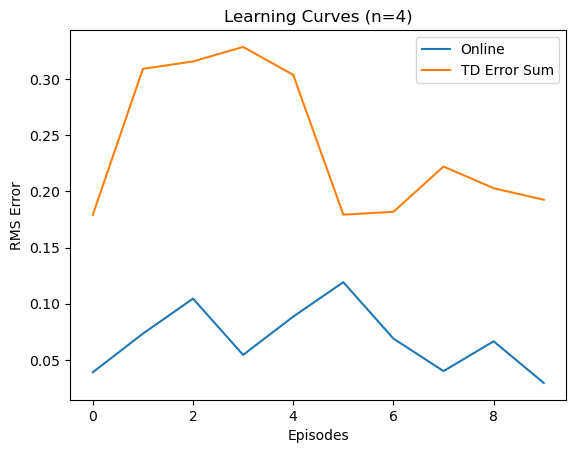

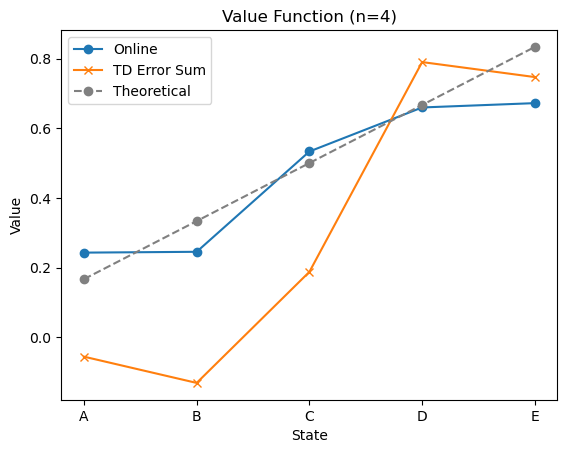

In [13]:
plt.figure()
plt.title(f"Learning Curves (n={n})")
plt.xlabel("Episodes")
plt.ylabel("RMS Error")
rms0 = np.sqrt((np.mean(n_step_td_history - v_star, axis=1) ** 2))      
rms1 = np.sqrt((np.mean(td_err_history - v_star, axis=1) ** 2))
plt.plot(rms0, label='Online')
plt.plot(rms1, label='TD Error Sum')
plt.legend()
plt.show()


plt.figure()
plt.title(f"Value Function (n={n})")
plt.xlabel("State")
plt.ylabel("Value")
plt.xticks(range(size + 1), [chr(ord('A') + i) for i in range(size + 1)])
plt.plot(n_step_td_history[-1], 'o-', label='Online')
plt.plot(td_err_history[-1], 'x-', label='TD Error Sum')
plt.plot(v_star, 'o--', color='gray', label='Theoretical')
plt.legend()
plt.show()

In [14]:
ns = [1, 2, 3]
alphas = np.linspace(0, 0.5, num=20)
rms10int0 = np.zeros([len(ns), len(alphas)])
rms10int1 = np.zeros([len(ns), len(alphas)])

for i, n in enumerate(ns):
    for j, alpha in enumerate(alphas):

        env.seed(7)
        state_values = agent.initialize_state_values((env.observation_space[0],env.observation_space[1]))
        history0 = agent.n_step_td_estimating(env, state_values, episodes=10, n=n, alpha=alpha, debug=True)

        rmsint0 = np.sqrt((history0 - v_star) ** 2).mean()
        rms10int0[i, j] = rmsint0
        
        env.seed(7)
        state_values = agent.initialize_state_values((env.observation_space[0],env.observation_space[1]))
        history1 = agent.sum_td_errors_estimating(env, state_values, episodes=10, n=n, alpha=alpha, debug=False)

        rmsint1 = np.sqrt((history1 - v_star) ** 2).mean()
        rms10int1[i, j] = rmsint1

---------------------------
Episode 1
Action: 1
Step: 0 | State: [0 3] | Action: 1 | Next State: [0 2] | Reward: 0 | State Values: [0.5 0.5 0.5 0.5 0.5] | Step: 0 | T: inf | time: 0
Action: 0
Step: 1 | State: [0 2] | Action: 0 | Next State: [0 3] | Reward: 0 | State Values: [0.5 0.5 0.5 0.5 0.5] | Step: 1 | T: inf | time: 1
Action: 1
Step: 2 | State: [0 3] | Action: 1 | Next State: [0 2] | Reward: 0 | State Values: [0.5 0.5 0.5 0.5 0.5] | Step: 2 | T: inf | time: 2
Action: 0
Step: 3 | State: [0 2] | Action: 0 | Next State: [0 3] | Reward: 0 | State Values: [0.5 0.5 0.5 0.5 0.5] | Step: 3 | T: inf | time: 3
Action: 1
Step: 4 | State: [0 3] | Action: 1 | Next State: [0 2] | Reward: 0 | State Values: [0.5 0.5 0.5 0.5 0.5] | Step: 4 | T: inf | time: 4
Action: 1
Step: 5 | State: [0 2] | Action: 1 | Next State: [0 1] | Reward: 0 | State Values: [0.5 0.5 0.5 0.5 0.5] | Step: 5 | T: inf | time: 5
Action: 1
Step: 6 | State: [0 1] | Action: 1 | Next State: [0 0] | Reward: 0 | State Values: [0.5 

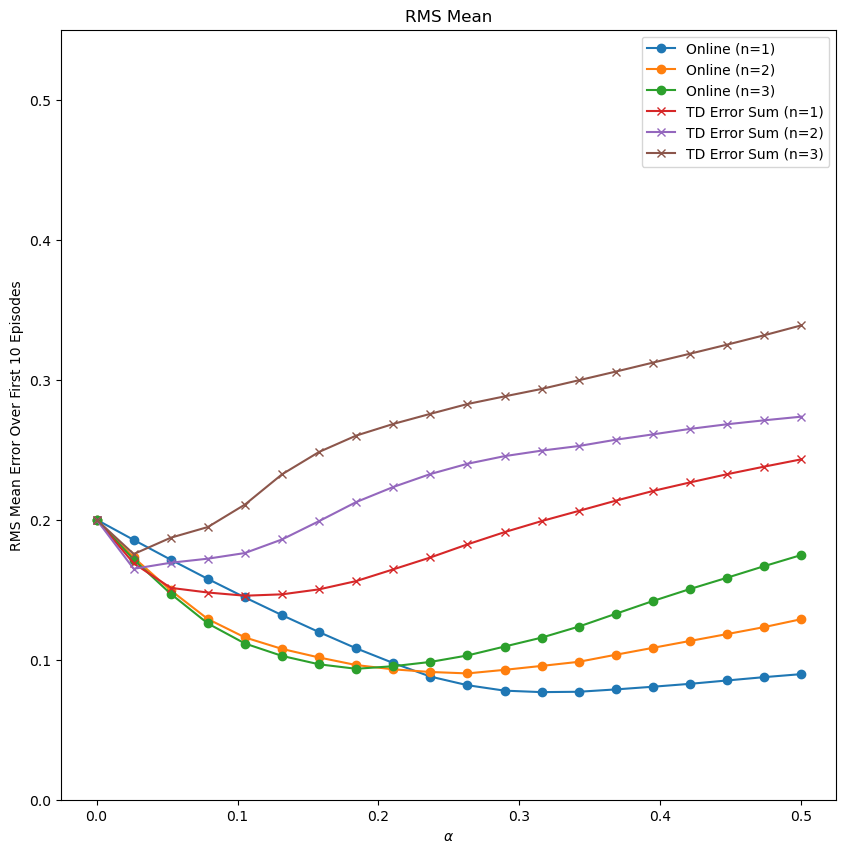

In [15]:
matplotlib.rcParams['figure.figsize'] = [10, 10]

plt.figure()
plt.title(f"RMS Mean")
plt.xlabel(r"$\alpha$"); plt.ylim([0, 0.55])
plt.ylabel("RMS Mean Error Over First 10 Episodes")
for i, n in enumerate(ns):
    plt.plot(alphas, rms10int0[i, :], 'o-', label=f'Online (n={n})')
for i, n in enumerate(ns):
    plt.plot(alphas, rms10int1[i, :], 'x-', label=f'TD Error Sum (n={n})')
plt.legend(loc=0)
plt.show()